In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_excel("resources\Datathon_data-2025-Raw.xlsx")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\PikaKight-Starlight\AppData\Local\Temp\ipykernel_37460\3106167131.py:1: SyntaxWarning: invalid escape sequence '\D'
  raw_data = pd.read_excel("resources\Datathon_data-2025-Raw.xlsx")


In [3]:
selected_raw_data = raw_data.drop(columns=['Country Name','Country Code', 'Time', 'Time Code'])


cleaned_data = selected_raw_data.replace("..", np.nan).apply(pd.to_numeric, errors='coerce')

print(len(cleaned_data))

cleaned_data.describe()

C:\Users\PikaKight-Starlight\AppData\Local\Temp\ipykernel_37460\2788652166.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data = selected_raw_data.replace("..", np.nan).apply(pd.to_numeric, errors='coerce')


3260


,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],"Air transport, freight (million ton-km) [IS.AIR.GOOD.MT.K1]","Air transport, registered carrier departures worldwide [IS.AIR.DPRT]",Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],Broad money growth (annual %) [FM.LBL.BMNY.ZG],Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS],Bank liquid reserves to bank assets ratio (%) [FD.RES.LIQU.AS.ZS],Bank nonperforming loans to total gross loans (%) [FB.AST.NPER.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",...,"Short-term debt (% of exports of goods, services and primary income) [DT.DOD.DSTC.XP.ZS]",Income share held by fourth 20% [SI.DST.04TH.20],Income share held by highest 10% [SI.DST.10TH.10],Income share held by highest 20% [SI.DST.05TH.20],Income share held by lowest 10% [SI.DST.FRST.10],Income share held by lowest 20% [SI.DST.FRST.20],Income share held by second 20% [SI.DST.02ND.20],Income share held by third 20% [SI.DST.03RD.20],Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]
count,2.299000e+03,2299.000000,1933.000000,2.031000e+03,2251.000000,2244.000000,1764.000000,2129.000000,1800.000000,908.000000,...,1631.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,2597.000000,2.449000e+03
mean,3.513186e+11,10739.568035,1296.234035,2.014360e+05,63.205683,12.359309,9.313612,24.927090,6.928161,60.656958,...,18.446957,22.082987,28.035822,43.352930,2.685728,6.935444,11.659735,15.971172,4.284641,1.661873e+10
std,1.426084e+12,14828.902355,4258.072322,8.210656e+05,48.081241,23.756766,5.287348,28.937897,8.015412,39.671899,...,19.847452,1.155282,5.507708,6.050551,0.873262,1.823794,1.946927,1.707702,2.471449,7.002536e+10
min,1.694327e+08,108.884410,0.000000,0.000000e+00,0.014517,-99.888243,-1.322527,0.204755,0.092335,1.845685,...,0.000000,15.700000,18.400000,32.600000,0.800000,2.400000,4.700000,8.000000,0.499852,8.535742e+06
25%,8.365480e+09,1433.041920,1.384000,7.648684e+03,33.856519,4.972290,6.923343,10.371487,2.174467,32.525535,...,4.307669,21.600000,24.000000,38.800000,2.000000,5.600000,10.400000,15.000000,2.838791,2.593582e+08
50%,3.060203e+10,4226.144704,22.206886,2.547800e+04,52.819588,9.407336,8.903706,18.591528,4.117839,51.147052,...,13.035262,22.300000,26.600000,41.800000,2.800000,7.150000,12.000000,16.400000,3.940700,1.159955e+09
75%,1.788599e+11,12429.619608,480.379190,1.232897e+05,77.654159,15.607286,11.164335,29.052673,8.865556,80.293919,...,25.809709,22.800000,30.875000,46.600000,3.300000,8.300000,13.100000,17.200000,5.150000,7.485187e+09
max,1.959300e+13,81275.574702,46004.645648,1.009903e+07,461.607361,708.928600,179.431226,390.110049,61.116041,249.411354,...,135.709123,25.500000,51.800000,68.900000,4.500000,10.500000,15.400000,19.100000,23.628830,1.046599e+12


In [4]:
# Supply Chain Cost = Transportation cost + Trade cost + Operation cost + Other Factor

transportation = ["Air transport, freight (million ton-km) [IS.AIR.GOOD.MT.K1]",
                  "Air transport, registered carrier departures worldwide [IS.AIR.DPRT]",
                  "Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE]"
                ]

trade = ["Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]",
         "Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]",
         "Customs and other import duties (% of tax revenue) [GC.TAX.IMPT.ZS]",
         "Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]"
        ]

operation = ["Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS]",
             "Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]"
            ]

weight = {
    'Transport': 0.4,
    'Trade': 0.3,
    'Ops': 0.2,
    'Other': 0.1
}

In [5]:
cleaned_data = cleaned_data[cleaned_data.isnull().mean(axis=1) <= 0.5]

cleaned_data = cleaned_data.fillna(cleaned_data.mean())

In [6]:
mmScaler = MinMaxScaler()

transport_data = mmScaler.fit_transform(cleaned_data[transportation])

cleaned_data['Transportation Cost'] = transport_data.mean(axis=1)

trade_data = mmScaler.fit_transform(cleaned_data[trade])

cleaned_data['Trade Cost'] = trade_data.mean(axis=1)

operation_data = mmScaler.fit_transform(cleaned_data[operation])

cleaned_data['Operation Cost'] = operation_data.mean(axis=1)

C:\Users\PikaKight-Starlight\AppData\Local\Temp\ipykernel_37460\1128572793.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data['Transportation Cost'] = transport_data.mean(axis=1)
C:\Users\PikaKight-Starlight\AppData\Local\Temp\ipykernel_37460\1128572793.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data['Trade Cost'] = trade_data.mean(axis=1)
C:\Users\PikaKight-Starlight\AppData\Local\Temp\ipykernel_37460\1128572793.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [7]:

cleaned_data['Supply Chain Cost'] = (
    weight["Transport"] * cleaned_data['Transportation Cost'] +
    weight["Trade"] * cleaned_data['Trade Cost'] +
    weight["Ops"] * cleaned_data['Operation Cost'] + 
    weight["Other"] * cleaned_data["Logistics performance index: Overall (1=low to 5=high) [LP.LPI.OVRL.XQ]"]
)

print(cleaned_data['Supply Chain Cost'])

1       0.342924
2       0.416136
3       0.346289
4       0.405672
5       0.330032
          ...   
3250    0.389373
3251    0.390674
3252    0.384129
3253    0.369242
3254    0.401110
Name: Supply Chain Cost, Length: 2420, dtype: float64


C:\Users\PikaKight-Starlight\AppData\Local\Temp\ipykernel_37460\2246987209.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data['Supply Chain Cost'] = (


In [8]:
new_data = cleaned_data.drop(columns=["Logistics performance index: Overall (1=low to 5=high) [LP.LPI.OVRL.XQ]",
                                      'Transportation Cost', 'Trade Cost', 'Operation Cost', 
                                      'Logistics performance index: Ability to track and trace consignments (1=low to 5=high) [LP.LPI.TRAC.XQ]',
                                      'Logistics performance index: Competence and quality of logistics services (1=low to 5=high) [LP.LPI.LOGS.XQ]',
                                      'Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high) [LP.LPI.ITRN.XQ]',
                                      'Logistics performance index: Efficiency of customs clearance process (1=low to 5=high) [LP.LPI.CUST.XQ]',
                                      'Logistics performance index: Frequency with which shipments reach consignee within scheduled or expected time (1=low to 5=high) [LP.LPI.TIME.XQ]',
                                      'Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high) [LP.LPI.INFR.XQ]'])

new_data = new_data.drop(columns=transportation)
new_data = new_data.drop(columns=trade)
new_data = new_data.drop(columns=operation)

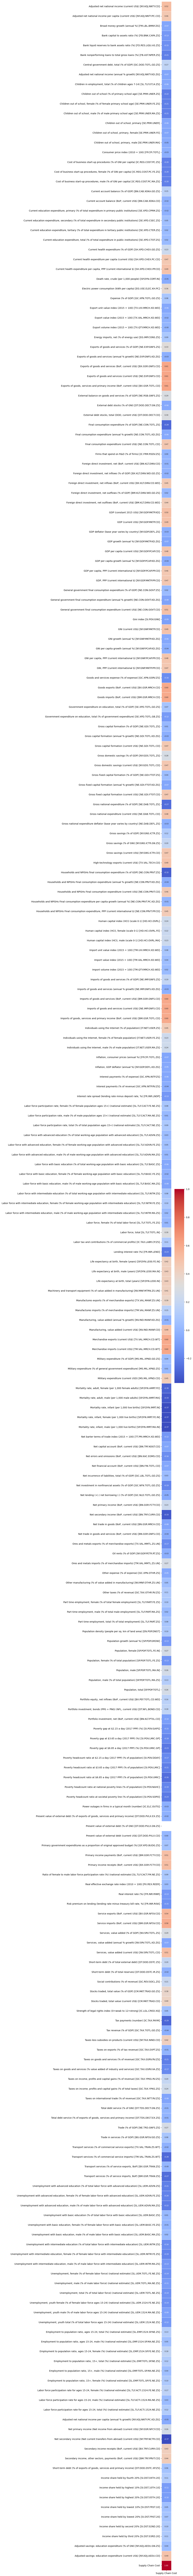

In [9]:
target = "Supply Chain Cost"

correlations = new_data.corr()

target_correlations = correlations[target]

plt.figure(figsize=(5, 200))

heat_map = sns.heatmap(target_correlations.to_frame(),
                        cmap="coolwarm",          # Use a visually appealing colormap
                        cbar=True,
                        annot=True,
                        square=True,
                        fmt='.2f',
                        annot_kws={'size': 7.5},
                        cbar_kws={"shrink": 0.8},
                        linewidths=0.5
                       )
plt.show()

In [10]:
threshold_corr = abs(target_correlations).mean()

print(threshold_corr)

focused_data = new_data[target_correlations[abs(target_correlations) >= threshold_corr].index]

target_col = focused_data[target]

features = focused_data.drop(columns=[target])


0.2004154232803116


In [11]:
X = features.values
y = target_col.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridgePipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_regression', Ridge(alpha=1))
])

ridgePipeline.fit(X_train, y_train)

ridge_pred = ridgePipeline.predict(X_test)

mse = mean_squared_error(y_test, ridge_pred)
rmse = root_mean_squared_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

print(f"""

Mean Square Error: {mse}
Root Mean Squared Error: {rmse}
R2 Score: {r2}

""")



Mean Square Error: 0.0009820070838492873
Root Mean Squared Error: 0.0313369922591382
R2 Score: 0.6314194482001732




In [12]:
coef = ridgePipeline.named_steps['ridge_regression'].coef_
feature_names = features.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()

coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

print(coef_df.head(20))

                                               Feature  Coefficient  \
23            GDP (constant 2015 US$) [NY.GDP.MKTP.KD]     0.048261   
36   Gross domestic savings (current US$) [NY.GDS.T...    -0.043797   
34   Gross capital formation (current US$) [NE.GDI....    -0.040491   
73              Population, female [SP.POP.TOTL.FE.IN]     0.031011   
61   Manufacturing, value added (current US$) [NV.I...     0.029265   
74                Population, male [SP.POP.TOTL.MA.IN]    -0.027937   
27   GDP, PPP (current international $) [NY.GDP.MKT...    -0.027704   
101  Secondary income receipts (BoP, current US$) [...    -0.025206   
65   Mortality rate, adult, female (per 1,000 femal...     0.024853   
62   Merchandise exports (current US$) [TX.VAL.MRCH...     0.023794   
40        Gross savings (current US$) [NY.GNS.ICTR.CD]     0.023758   
37   Gross fixed capital formation (current US$) [N...     0.022441   
44   Households and NPISHs Final consumption expend...     0.021148   
102  S

In [13]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': ridge_pred
})

print(comparison.head())

     Actual  Predicted
0  0.532805   0.495690
1  0.514808   0.454893
2  0.377437   0.360100
3  0.375191   0.382461
4  0.412158   0.404263


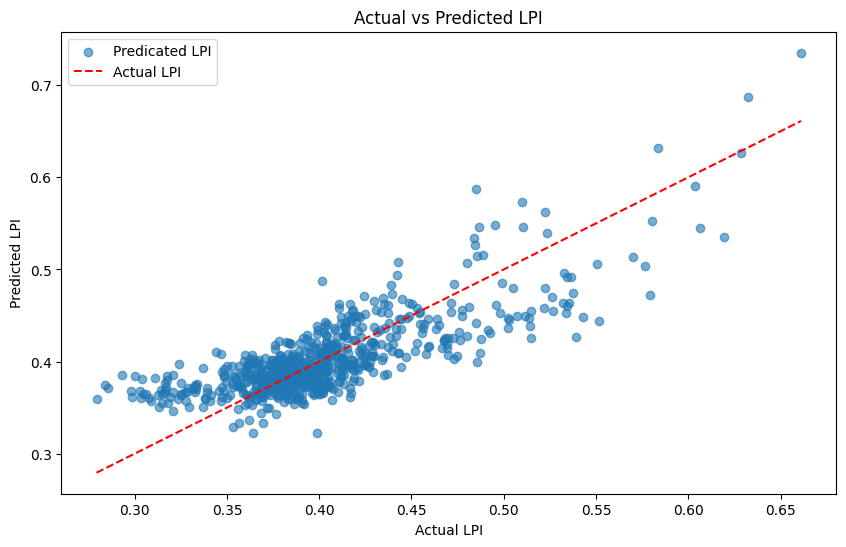

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, ridge_pred, alpha=0.6, label="Predicated LPI")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Actual LPI")  # Ideal line

plt.legend(loc='upper left')

plt.xlabel('Actual LPI')
plt.ylabel('Predicted LPI')
plt.title('Actual vs Predicted LPI')

plt.show()